In [2]:
import yfinance as yf

# For plotting
import plotly.graph_objects as go
from datetime import datetime

import numpy as np
import pandas as pd
import pandas_ta as ta

class StockTicker():
    columns_to_drop = ['volume','dividends', 'stock_splits'] # 'date', 
    
    def __init__(self, ticker, period="max"):
        self.df = pd.DataFrame().ta.ticker(ticker, period=period)
        self.df.ta.adjusted = "adj_close"
        self.clean_columns()
        self.add_moving_average()
        self.add_target()
        self.df.dropna(inplace=True)
        #self.df['weekday'] = self.df['date'].dt.day_of_week # numeric encoded day of week
        
    def clean_columns(self):
        self.df.reset_index(inplace=True)
        self.df.columns = self.df.columns.str.lower().str.replace(' ', '_')
        self.df.drop(self.columns_to_drop, axis=1, inplace=True)
        
    def add_moving_average(self):
        self.df['rsi']  = ta.rsi(self.df.close, length=15)
        self.df['emaf'] = ta.ema(self.df.close, length=20) #fast moving avg
        self.df['emam'] = ta.ema(self.df.close, length=100) #medium moving avg
        self.df['emas'] = ta.ema(self.df.close, length=150) #slow moving avg

    def add_target(self):
        self.df['target']            = self.df.close - self.df.open
        self.df['target']            = self.df.target.shift(-1)
        self.df['target_class']      = [1 if self.df.target[i]>0 else 0 for i in range(len(self.df))]
        self.df['target_next_close'] = self.df.close.shift(-1)

    @property
    def features(self):
        return self.df[['open', 'high', 'low', 'close', 'rsi', 'emaf', 'emas', 'emam']]
    
    @property
    def targets(self):
        return self.df[['target', 'target_class', 'target_next_close']]
    
    @property
    def dataframe(self):
        return self.df


(46, 7)


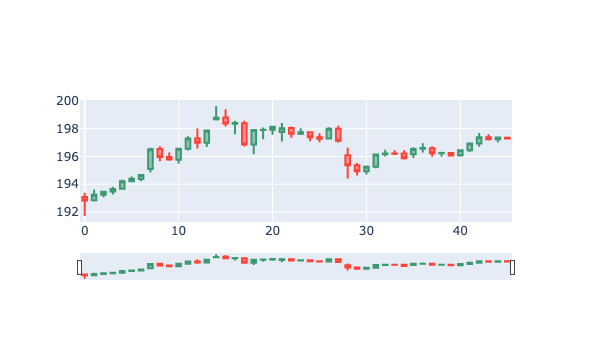

In [21]:
ticker = StockTicker('adbe', period="8mo")
df = pd.DataFrame().ta.ticker('AAPL', period="7d", interval="1h")
print(df.shape)
fig = go.Figure(data=[go.Candlestick(
#    x=df['Date'],
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])

fig.show()